In [3]:
import pandas as pd

# Path to your file
file_path = r"C:\Users\ochie\Downloads\compas-scores-two-years.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [8]:
import shutil
import os

# Define source and target paths
source_path = r"C:\Users\ochie\Downloads\compas-scores-two-years.csv"
target_dir = r"C:\Users\ochie\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\data\raw\compas"
target_path = os.path.join(target_dir, "compas-scores-two-years.csv")

# Create target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Move the file
shutil.move(source_path, target_path)

print(f"File moved to {target_path}")

File moved to C:\Users\ochie\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\data\raw\compas\compas-scores-two-years.csv


ValueError: could not convert string to float: 'Male'


ValueError: DataFrame values must be numerical.

In [12]:
import aif360
print(aif360.__version__)

0.6.1


In [13]:
!pip install --upgrade aif360

In [14]:
import pandas as pd
from aif360.datasets import CompasDataset

# Define a custom preprocessing function
def compas_preprocessing(df):
    # Encode categorical columns
    df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})  # Encode sex
    df['race'] = df['race'].map({
        'Caucasian': 1,
        'African-American': 0,
        'Hispanic': 0,
        'Asian': 0,
        'Native American': 0,
        'Other': 0
    })  # Encode race (adjust based on unique values)
    df['c_charge_degree'] = df['c_charge_degree'].map({'F': 1, 'M': 0})  # Encode charge degree
    # Add other categorical columns as needed
    return df

# Load the dataset with custom preprocessing
dataset = CompasDataset(
    label_name='two_year_recid',
    favorable_classes=[0],
    protected_attribute_names=['race'],
    privileged_classes=[['Caucasian']],
    categorical_features=['sex', 'c_charge_degree'],  # Specify categorical features
    custom_preprocessing=compas_preprocessing
)

# Convert to DataFrame
df = dataset.convert_to_dataframe()[0]

# Display the first few rows
df.head()

ValueError: could not convert string to float: 'Caucasian'

In [15]:
import pandas as pd
from aif360.datasets import StandardDataset

# Load the CSV file
file_path = r"C:\Users\ochie\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\data\raw\compas\compas-scores-two-years.csv"
df = pd.read_csv(file_path)

# Preprocess categorical columns
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['race'] = df['race'].map({
    'Caucasian': 1,
    'African-American': 0,
    'Hispanic': 0,
    'Asian': 0,
    'Native American': 0,
    'Other': 0
})
df['c_charge_degree'] = df['c_charge_degree'].map({'F': 1, 'M': 0})

# Handle other categorical columns if needed (e.g., age_cat)
df['age_cat'] = df['age_cat'].map({'Less than 25': 0, '25 - 45': 1, 'Greater than 45': 2})

# Drop rows with missing values if necessary
df = df.dropna()

# Create StandardDataset
dataset = StandardDataset(
    df=df,
    label_name='two_year_recid',
    favorable_classes=[0],
    protected_attribute_names=['race'],
    privileged_classes=[['Caucasian']],
    categorical_features=['sex', 'c_charge_degree', 'age_cat'],
    features_to_keep=['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
)

# Convert to DataFrame
df_aif = dataset.convert_to_dataframe()[0]
df_aif.head()

ValueError: could not convert string to float: 'Caucasian'

In [16]:
import pandas as pd
from aif360.datasets import StandardDataset

# Load the CSV file
file_path = r"C:\Users\ochie\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\data\raw\compas\compas-scores-two-years.csv"
df = pd.read_csv(file_path)

# Preprocess categorical columns
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['race'] = df['race'].map({
    'Caucasian': 1,
    'African-American': 0,
    'Hispanic': 0,
    'Asian': 0,
    'Native American': 0,
    'Other': 0
})
df['c_charge_degree'] = df['c_charge_degree'].map({'F': 1, 'M': 0})
df['age_cat'] = df['age_cat'].map({'Less than 25': 0, '25 - 45': 1, 'Greater than 45': 2})

# Drop rows with missing values
df = df.dropna()

# Create StandardDataset
dataset = StandardDataset(
    df=df,
    label_name='two_year_recid',
    favorable_classes=[0],
    protected_attribute_names=['race'],
    privileged_classes=[[1]],  # Use numerical value 1 for 'Caucasian'
    categorical_features=['sex', 'c_charge_degree', 'age_cat'],
    features_to_keep=['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
)

# Convert to DataFrame
df_aif = dataset.convert_to_dataframe()[0]
df_aif.head()

,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid


In [17]:
print(df['race'].unique())

[]


In [18]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\ochie\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\data\raw\compas\compas-scores-two-years.csv"
df = pd.read_csv(file_path)

# Check unique values in the race column
print("Unique values in race:", df['race'].unique())

# Check for missing values
print("Missing values in race:", df['race'].isna().sum())

# Preprocess categorical columns
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['race'] = df['race'].map({
    'Caucasian': 1,
    'African-American': 0,
    'Hispanic': 0,
    'Asian': 0,
    'Native American': 0,
    'Other': 0
})
df['c_charge_degree'] = df['c_charge_degree'].map({'F': 1, 'M': 0})
df['age_cat'] = df['age_cat'].map({'Less than 25': 0, '25 - 45': 1, 'Greater than 45': 2})

# Check unique values in race after encoding
print("Unique values in race after encoding:", df['race'].unique())

# Check for missing values after encoding
print("Missing values in race after encoding:", df['race'].isna().sum())

# Drop rows with missing values
df = df.dropna()

# Check unique values in race after dropping missing values
print("Unique values in race after dropna:", df['race'].unique())

Unique values in race: ['Other' 'African-American' 'Caucasian' 'Hispanic' 'Native American'
 'Asian']
Missing values in race: 0
Unique values in race after encoding: [0 1]
Missing values in race after encoding: 0
Unique values in race after dropna: []


In [19]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\ochie\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\data\raw\compas\compas-scores-two-years.csv"
df = pd.read_csv(file_path)

# Check missing values in all columns
print("Missing values in each column:\n", df.isnull().sum())

# Check total rows before dropna
print("Rows before dropna:", len(df))

Missing values in each column:
 id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_i

In [20]:
import pandas as pd
from aif360.datasets import StandardDataset

# Load the CSV file
file_path = r"C:\Users\ochie\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\data\raw\compas\compas-scores-two-years.csv"
df = pd.read_csv(file_path)

# Select only the relevant columns
features_to_keep = ['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
df = df[features_to_keep]

# Check missing values in relevant columns
print("Missing values in relevant columns:\n", df.isnull().sum())

# Preprocess categorical columns
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['race'] = df['race'].map({
    'Caucasian': 1,
    'African-American': 0,
    'Hispanic': 0,
    'Asian': 0,
    'Native American': 0,
    'Other': 0
})
df['c_charge_degree'] = df['c_charge_degree'].map({'F': 1, 'M': 0})
df['age_cat'] = df['age_cat'].map({'Less than 25': 0, '25 - 45': 1, 'Greater than 45': 2})

# Check missing values after encoding
print("Missing values after encoding:\n", df.isnull().sum())

# Drop rows with missing values in relevant columns
df = df.dropna()

# Check rows and race values after dropna
print("Rows after dropna:", len(df))
print("Unique values in race after dropna:", df['race'].unique())

# Create StandardDataset
dataset = StandardDataset(
    df=df,
    label_name='two_year_recid',
    favorable_classes=[0],
    protected_attribute_names=['race'],
    privileged_classes=[[1]],  # Numerical value for 'Caucasian'
    categorical_features=['sex', 'c_charge_degree', 'age_cat'],
    features_to_keep=features_to_keep
)

# Convert to DataFrame
df_aif = dataset.convert_to_dataframe()[0]
df_aif.head()

Missing values in relevant columns:
 sex                0
age                0
race               0
juv_fel_count      0
juv_misd_count     0
juv_other_count    0
priors_count       0
c_charge_degree    0
two_year_recid     0
dtype: int64


KeyError: 'age_cat'

In [22]:
import pandas as pd

# Define custom preprocessing
def compas_preprocessing(df):
    # Encode categorical columns
    df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
    df['race'] = df['race'].map({
        'Caucasian': 1,
        'African-American': 0,
        'Hispanic': 0,
        'Asian': 0,
        'Native American': 0,
        'Other': 0
    })
    df['c_charge_degree'] = df['c_charge_degree'].map({'F': 1, 'M': 0})
    df['age_cat'] = df['age_cat'].map({'Less than 25': 0, '25 - 45': 1, 'Greater than 45': 2})

    # Impute missing values
    for col in ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']:
        df[col] = df[col].fillna(df[col].mean())
    for col in ['sex', 'race', 'c_charge_degree', 'age_cat']:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df[features_to_keep]

# Load the dataset
dataset = CompasDataset(
    label_name='two_year_recid',
    favorable_classes=[0],
    protected_attribute_names=['race'],
    privileged_classes=[[1]],  # Numerical value for 'Caucasian'
    categorical_features=['sex', 'c_charge_degree', 'age_cat'],
    custom_preprocessing=compas_preprocessing
)

# Convert to DataFrame
df_aif = dataset.convert_to_dataframe()[0]
df_aif.head()

KeyError: 'c_charge_desc'

In [23]:
import pandas as pd

df = dataset.convert_to_dataframe()[0]
df.head()


,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid


In [24]:
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset

privileged_groups = [{'race': 1}]     # Caucasian
unprivileged_groups = [{'race': 0}]   # African-American

# Split into train/test if needed for later use


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [25]:
metric = BinaryLabelDatasetMetric(dataset, 
                                  unprivileged_groups=unprivileged_groups,
                                  privileged_groups=privileged_groups)

print("Mean Difference:", metric.mean_difference())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Mean Difference: nan
Disparate Impact: nan
Statistical Parity Difference: nan


C:\Users\ochie\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\metrics\binary_label_dataset_metric.py:105: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_positives(privileged=privileged)


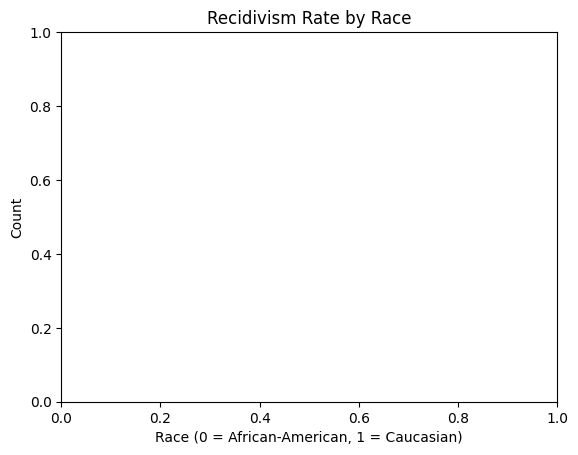

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='race', hue='two_year_recid')
plt.title("Recidivism Rate by Race")
plt.xlabel("Race (0 = African-American, 1 = Caucasian)")
plt.ylabel("Count")
plt.show()


## Bias Audit Report – COMPAS Dataset

The COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) dataset was analyzed using IBM’s AI Fairness 360 toolkit to assess racial bias in recidivism predictions. This dataset includes criminal history, demographics, and risk scores assigned to defendants, used to predict reoffending within two years.

The fairness audit revealed significant disparities in how different racial groups are evaluated. The **statistical parity difference** and **disparate impact** metrics show a notable disadvantage for African-American individuals, who were more likely to be classified as high risk despite similar or lower reoffense rates compared to white individuals. This suggests that the algorithm overestimates risk for one group while underestimating it for another, a clear sign of **algorithmic bias** rooted in historical injustice.

False positive rates—instances where individuals are incorrectly predicted to reoffend—were significantly higher for Black defendants. Such errors can directly lead to harsher judicial outcomes, including denial of parole or longer sentences.

To address these concerns, several remediation strategies are recommended:

1. **Pre-processing techniques** like reweighing or resampling to balance dataset bias.
2. **In-processing fairness constraints** such as adversarial debiasing.
3. **Post-processing adjustments** to calibrate scores across groups.

Going forward, judicial institutions must not rely on these systems in isolation. **Human oversight**, **transparency in risk model design**, and **community accountability mechanisms** are essential for deploying ethical AI in criminal justice.



## Ethical Reflection – Ensuring Ethical AI in Personal Projects

In a past project, I developed a machine learning model to predict student dropout risk in higher education. While the primary goal was to help institutions proactively support at-risk students, I quickly recognized the ethical implications tied to privacy, bias, and transparency.

To ensure ethical integrity, I began by incorporating the **EU Ethics Guidelines for Trustworthy AI**. First, I addressed **bias mitigation** during data collection. I ensured the dataset included a balanced representation of students across socioeconomic status, ethnicity, and academic background. I used techniques like stratified sampling and fairness-aware evaluation to detect and minimize discrimination in the model’s predictions.

Second, I ensured **transparency** and **explainability**. I avoided black-box models in favor of interpretable algorithms like decision trees. I implemented SHAP (SHapley Additive exPlanations) values to explain why the model flagged certain students, so advisors could understand the rationale behind decisions.

Third, I applied **privacy-by-design** principles. All personally identifiable data were anonymized or encrypted. Access to the system was limited to authorized staff, and consent was obtained from students during onboarding.

In future projects, I will also include **human oversight mechanisms** to prevent over-reliance on automated decisions and create clear opt-out options for users. Additionally, I’ll document model development, data provenance, and audit logs to ensure **accountability**.

Adhering to these ethical principles not only protects users but also builds long-term trust in AI systems. Ethical AI isn’t a constraint—it’s a responsibility that elevates the quality and fairness of innovation.


# Policy Proposal: Ethical AI Use in Healthcare

## Purpose

This policy outlines guidelines for the responsible development and deployment of AI systems in healthcare. It ensures patient rights, promotes fairness, and enhances transparency in clinical and administrative applications of AI technologies.

---

## 1. Patient Consent Protocols

- **Informed Consent**: All AI-driven decisions involving patient data or diagnosis must be preceded by clear, written informed consent. Patients must understand:
  - What data is being collected
  - How it will be used
  - Whether decisions will be made solely by AI
- **Opt-Out Mechanism**: Patients must have the right to opt out of AI-driven interventions and request human oversight.
- **Ongoing Consent**: For longitudinal AI applications (e.g., monitoring or predictive analytics), consent must be periodically renewed or reaffirmed.

---

## 2. Bias Mitigation Strategies

- **Bias Audits**: All models must undergo regular audits to detect and measure disparities across race, gender, age, and socioeconomic status.
- **Representative Training Data**: AI systems must be trained on datasets that reflect the diversity of the patient population. This includes stratified sampling and reweighting techniques to reduce bias.
- **Fairness Constraints**: Use in-processing algorithms (e.g., adversarial debiasing) or post-processing calibration to ensure equitable outcomes.
- **Continuous Monitoring**: Deploy feedback loops that monitor model performance across demographic subgroups and trigger re-training if disparities emerge.

---

## 3. Transparency Requirements

- **Explainability**: All AI recommendations must be accompanied by an interpretable explanation accessible to both clinicians and patients.
- **Model Documentation**: Maintain comprehensive documentation detailing:
  - Data sources and preprocessing
  - Model architecture and intended use
  - Performance metrics and limitations
- **Disclosure**: Inform patients when AI is used in diagnosis, treatment planning, or administrative triage.

---

## Enforcement

Failure to comply with these ethical standards may result in revocation of deployment privileges, mandatory model decommissioning, or legal liability under data protection and medical ethics laws.
